In [1]:
import numpy as np
import pandas as pd
%matplotlib inline 
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
#zori = pd.read_csv("ZipCodes_ZORI_AllHomesPlusMultifamily_SSA.csv", index_col=0, dtype={"RegionName": "str"})

In [37]:
zori.head()

NameError: name 'zori' is not defined

In [ ]:
# Stripping the leading and trailing spaces in MsaName column
zori['MsaName']=zori['MsaName'].str.strip()

In [ ]:
zori[zori['MsaName'] == "New York, NY"]

In [ ]:
zori.dtypes

In [ ]:
zori.to_csv("zoriR.csv")

In [ ]:
zori['MsaName']

#### Read the file created in R with selected features from ACS Dataset

In [2]:
zacs_features1 = pd.read_csv("zacs_features1.csv", index_col=0)

In [3]:
zacs_features1.head()

,RegionName,ZORI,Year,renter_occupied_housing_units_paying_cash_median_gross_rent,owner_occupied_housing_units_median_value,married_households,housing_units_renter_occupied,nonfamily_households,vacant_housing_units_for_rent,income_10000_29999,...,occupation_natural_resources_construction_maintenance,median_age,total_pop,white_pop,black_pop,hispanic_pop,walked_to_work,commuters_by_public_transportation,commute_10_14_mins,gini_index
1,10025,2883,2014,1438,976900,13337,33778,24576,991,12032,...,1269,39.3,97373,54332,9768,21654,6270,32889,2530,0.5699
2,10025,2895,2014,1438,976900,13337,33778,24576,991,12032,...,1269,39.3,97373,54332,9768,21654,6270,32889,2530,0.5699
3,10025,2907,2014,1438,976900,13337,33778,24576,991,12032,...,1269,39.3,97373,54332,9768,21654,6270,32889,2530,0.5699
4,10025,2920,2014,1438,976900,13337,33778,24576,991,12032,...,1269,39.3,97373,54332,9768,21654,6270,32889,2530,0.5699
5,10025,2933,2014,1438,976900,13337,33778,24576,991,12032,...,1269,39.3,97373,54332,9768,21654,6270,32889,2530,0.5699


### Multiple Linear Regression 

In [5]:
# Import packages
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [6]:
#Modela - No transformation of dependent or independent feature but applying normalization during LinearRegression
modelaX = zacs_features1.drop("ZORI", axis =1)
modelay = zacs_features1["ZORI"]

In [7]:
#Modela Split into test and train sets
modelaX_train, modelaX_test, modelay_train, modelay_test = train_test_split(modelaX, modelay, random_state=2, test_size=0.2)

In [8]:
# Modela linear regression with normalization=true
modela_ols = LinearRegression(normalize = True)
modela_ols.fit(modelaX_train, modelay_train)

LinearRegression(normalize=True)

In [9]:
#Scores for train and test sets
print("R^2 for train set: %f" %modela_ols.score(modelaX_train, modelay_train))

print('-'*30)

print("R^2 for test  set: %f" %modela_ols.score(modelaX_test, modelay_test))

R^2 for train set: 0.830119
------------------------------
R^2 for test  set: 0.830329


In [10]:
# RMSE for modela
from sklearn.metrics import mean_squared_error
mean_squared_error(modelay_test, modela_ols.predict(modelaX_test), squared = False)

253.15137539613593

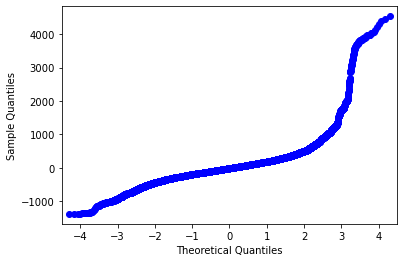

                            OLS Regression Results                            
Dep. Variable:                   ZORI   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                 1.902e+04
Date:                Mon, 19 Jul 2021   Prob (F-statistic):               0.00
Time:                        04:06:00   Log-Likelihood:            -8.6540e+05
No. Observations:              124579   AIC:                         1.731e+06
Df Residuals:                  124546   BIC:                         1.731e+06
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

In [11]:
# Ran this to get the p-values for variables  as well as qqplot to see if errors are normally distributed
import statsmodels.api as sm 
modelaX_add_const = sm.add_constant(modelaX_train)
modelasm = sm.OLS(modelay_train, modelaX_add_const)
fitted = modelasm.fit()
res = fitted.resid
fig = sm.qqplot(res)
plt.show()
print(fitted.summary())

#### Remove ZORI outliers and run Model a again as Model b

In [12]:
# Removing the outlier observations as determined after testing for linearity in model 3 below
indices = zacs_features1['ZORI'] <4000
zacs_features11 = zacs_features1[indices]

In [13]:
# Modelb - Outliers removed based on model 3 linearity results. Also, no transformation of dependent or independent feature as above and applying normalization during LinearRegression
modelbX = zacs_features11.drop("ZORI", axis =1)
modelby = zacs_features11["ZORI"]

In [14]:
#Split into test and train sets for Modelb which does not contain outliers
modelbX_train, modelbX_test, modelby_train, modelby_test = train_test_split(modelbX, modelby, random_state=2, test_size=0.2)

In [15]:
# Modelb linear regression with no normalization
modelb_ols = LinearRegression(normalize=True)
modelb_ols.fit(modelbX_train, modelby_train)

LinearRegression(normalize=True)

In [16]:
#Scores for train and test sets
print("R^2 for train set: %f" %modelb_ols.score(modelbX_train, modelby_train))

print('-'*30)

print("R^2 for test  set: %f" %modelb_ols.score(modelbX_test, modelby_test))

R^2 for train set: 0.839045
------------------------------
R^2 for test  set: 0.835917


In [17]:
# RMSE for modelb. Improved the results
mean_squared_error(modelby_test, modelb_ols.predict(modelbX_test), squared = False)

227.93603606615582

In [18]:
testResults = modelbX_test.copy()
testResults['Actual'] = modelby_test
predictions = modelb_ols.predict(modelbX_test)
testResults['Predicted'] =predictions

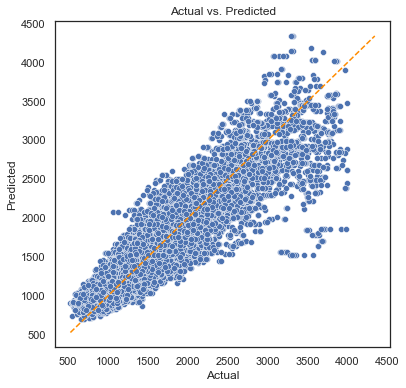

In [19]:
# Testing Linearity
sns.set(rc={'figure.figsize':(6,6)})
sns.set_style("white")
sns.scatterplot(x='Actual', y='Predicted', data=testResults)
line_coords = np.arange(testResults[['Actual', 'Predicted']].min().min(), testResults[['Actual', 'Predicted']].max().max()+1)
plt.plot(line_coords, line_coords, color='darkorange', linestyle='--')
plt.title('Actual vs. Predicted')
plt.show()

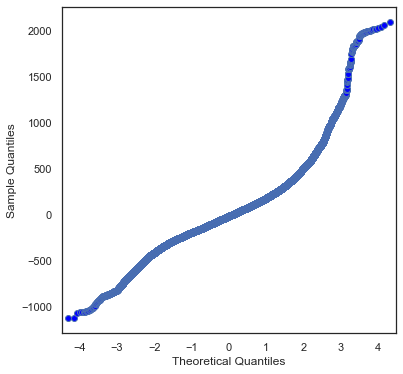

                            OLS Regression Results                            
Dep. Variable:                   ZORI   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                 2.020e+04
Date:                Mon, 19 Jul 2021   Prob (F-statistic):               0.00
Time:                        04:06:01   Log-Likelihood:            -8.4736e+05
No. Observations:              124026   AIC:                         1.695e+06
Df Residuals:                  123993   BIC:                         1.695e+06
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

In [20]:
# Ran this to get the p-values for variables  as well as qqplot to see if errors are normally distributed
import statsmodels.api as sm 
modelbX_add_const = sm.add_constant(modelbX_train)
modelbsm = sm.OLS(modelby_train, modelbX_add_const)
fitted = modelbsm.fit()
res = fitted.resid
fig = sm.qqplot(res)
plt.show()
print(fitted.summary())

#### Further Removing higher-priced Rentals and running Model a again as Model c

In [21]:
# Removing some more high-priced observations to see if it improves predictability in terms of RMSE
indices = zacs_features1['ZORI'] <3500
zacs_features11 = zacs_features1[indices]

In [22]:
# Modelc - Outliers removed based on model 3 linearity results. Also, no transformation of dependent or independent feature as above and applying normalization during LinearRegression
modelcX = zacs_features11.drop("ZORI", axis =1)
modelcy = zacs_features11["ZORI"]

In [23]:
#Split into test and train sets for Modelc which does not contain outliers
modelcX_train, modelcX_test, modelcy_train, modelcy_test = train_test_split(modelcX, modelcy, random_state=2, test_size=0.2)

In [24]:
# Modelc linear regression with no normalization
modelc_ols = LinearRegression(normalize=True)
modelc_ols.fit(modelcX_train, modelcy_train)

LinearRegression(normalize=True)

In [25]:
#Scores for train and test sets
print("R^2 for train set: %f" %modelc_ols.score(modelcX_train, modelcy_train))

print('-'*30)

print("R^2 for test  set: %f" %modelc_ols.score(modelcX_test, modelcy_test))

R^2 for train set: 0.839720
------------------------------
R^2 for test  set: 0.838015


In [26]:
# RMSE for modelc. Improved the results. Still a slight improvement
mean_squared_error(modelcy_test, modelc_ols.predict(modelcX_test), squared = False)

211.02991257402715

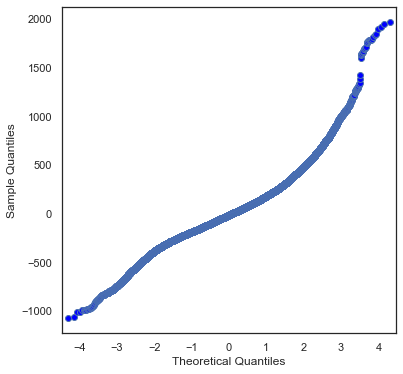

                            OLS Regression Results                            
Dep. Variable:                   ZORI   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                 2.013e+04
Date:                Mon, 19 Jul 2021   Prob (F-statistic):               0.00
Time:                        04:06:02   Log-Likelihood:            -8.3236e+05
No. Observations:              122976   AIC:                         1.665e+06
Df Residuals:                  122943   BIC:                         1.665e+06
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

In [27]:
# Ran this to get the p-values for variables  as well as qqplot to see if errors are normally distributed
import statsmodels.api as sm 
modelcX_add_const = sm.add_constant(modelcX_train)
modelcsm = sm.OLS(modelcy_train, modelcX_add_const)
fitted = modelcsm.fit()
res = fitted.resid
fig = sm.qqplot(res)
plt.show()
print(fitted.summary())

#### Modeld with median_income and total_pop features dropped

In [78]:
#Split into test and train sets for Modeld which has median_income removed and does not contain outliers
modeldX_train = modelbX_train.drop(["median_income", "total_pop"], axis =1)
modeldX_test = modelbX_test.drop(["median_income", "total_pop"], axis =1)
modeldy_train = modelby_train.copy()
modeldy_test = modelby_test.copy()

In [81]:
# Modeld linear regression with no normalization
modeld_ols = LinearRegression(normalize=True)
modeld_ols.fit(modeldX_train, modeldy_train)

LinearRegression(normalize=True)

In [82]:
#Scores for train and test sets
print("R^2 for train set: %f" %modeld_ols.score(modeldX_train, modeldy_train))

print('-'*30)

print("R^2 for test  set: %f" %modeld_ols.score(modeldX_test, modeldy_test))

R^2 for train set: 0.839045
------------------------------
R^2 for test  set: 0.835916


In [83]:
# RMSE for modeld. Improved the results. Still a slight improvement
mean_squared_error(modeldy_test, modeld_ols.predict(modeldX_test), squared = False)

227.93646887078725

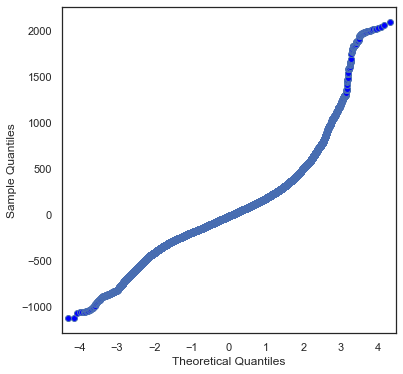

                            OLS Regression Results                            
Dep. Variable:                   ZORI   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                 2.155e+04
Date:                Mon, 19 Jul 2021   Prob (F-statistic):               0.00
Time:                        05:06:45   Log-Likelihood:            -8.4736e+05
No. Observations:              124026   AIC:                         1.695e+06
Df Residuals:                  123995   BIC:                         1.695e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

In [84]:
# Ran this to get the p-values for variables  as well as qqplot to see if errors are normally distributed
import statsmodels.api as sm 
modeldX_add_const = sm.add_constant(modeldX_train)
modeldsm = sm.OLS(modeldy_train, modeldX_add_const)
fitted = modeldsm.fit()
res = fitted.resid
fig = sm.qqplot(res)
plt.show()
print(fitted.summary())

#### MLR with transformed features

In [28]:
# Log transforming the dependent variable only
zacs_features1['logZORI'] = np.log(zacs_features1['ZORI'])

In [29]:
zacs_features1.drop("ZORI", axis =1)

,RegionName,Year,renter_occupied_housing_units_paying_cash_median_gross_rent,owner_occupied_housing_units_median_value,married_households,housing_units_renter_occupied,nonfamily_households,vacant_housing_units_for_rent,income_10000_29999,income_75000_99999,...,median_age,total_pop,white_pop,black_pop,hispanic_pop,walked_to_work,commuters_by_public_transportation,commute_10_14_mins,gini_index,logZORI
1,10025,2014,1438,976900,13337,33778,24576,991,12032,4228,...,39.3,97373,54332,9768,21654,6270,32889,2530,0.5699,7.966587
2,10025,2014,1438,976900,13337,33778,24576,991,12032,4228,...,39.3,97373,54332,9768,21654,6270,32889,2530,0.5699,7.970740
3,10025,2014,1438,976900,13337,33778,24576,991,12032,4228,...,39.3,97373,54332,9768,21654,6270,32889,2530,0.5699,7.974877
4,10025,2014,1438,976900,13337,33778,24576,991,12032,4228,...,39.3,97373,54332,9768,21654,6270,32889,2530,0.5699,7.979339
5,10025,2014,1438,976900,13337,33778,24576,991,12032,4228,...,39.3,97373,54332,9768,21654,6270,32889,2530,0.5699,7.983781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155720,60602,2018,3055,454234,420,377,182,1,66,20,...,30.6,1244,788,47,81,362,233,79,0.4940,7.723120
155721,60602,2018,3055,454234,420,377,182,1,66,20,...,30.6,1244,788,47,81,362,233,79,0.4940,7.725771
155722,60602,2018,3055,454234,420,377,182,1,66,20,...,30.6,1244,788,47,81,362,233,79,0.4940,7.728856
155723,60602,2018,3055,454234,420,377,182,1,66,20,...,30.6,1244,788,47,81,362,233,79,0.4940,7.731492


In [30]:
#zacs_features1.dtypes

In [31]:
#Model1 separating X and y variables -here we take log(ZORI)
modelX = zacs_features1.drop("logZORI", axis =1)
modely = zacs_features1["logZORI"]

In [32]:
#Split into test and train sets
modelX_train, modelX_test, modely_train, modely_test = train_test_split(modelX, modely, random_state=2, test_size=0.2)

In [33]:
# Model1 with just the dependent variable i.e. ZORI log transformed linear regression
simple_ols = LinearRegression() # Also tried with normalization. No change in scores or RMSE noted
simple_ols.fit(modelX_train, modely_train)

LinearRegression()

In [34]:
#Scores for train and test sets
print("R^2 for train set: %f" %simple_ols.score(modelX_train, modely_train))

print('-'*30)

print("R^2 for test  set: %f" %simple_ols.score(modelX_test, modely_test))

R^2 for train set: 0.949819
------------------------------
R^2 for test  set: 0.949150


In [35]:
# RMSE for model 1
from sklearn.metrics import mean_squared_error
mean_squared_error(np.exp(modely_test), np.exp(simple_ols.predict(modelX_test)), squared = False)

649.8490829939808

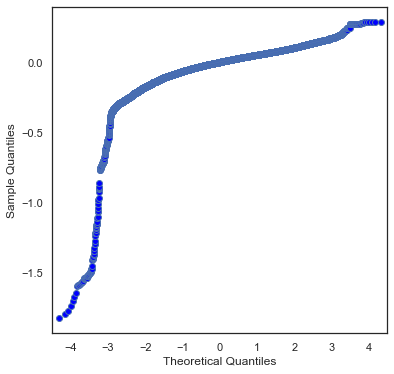

                            OLS Regression Results                            
Dep. Variable:                logZORI   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                 7.143e+04
Date:                Mon, 19 Jul 2021   Prob (F-statistic):               0.00
Time:                        04:06:03   Log-Likelihood:             1.4196e+05
No. Observations:              124579   AIC:                        -2.838e+05
Df Residuals:                  124545   BIC:                        -2.835e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

In [36]:
# Ran this to get the p-values for variables as well as qqplot to evaluate normal distribution of errors
import statsmodels.api as sm 
modelX_add_const = sm.add_constant(modelX_train)
simplesm = sm.OLS(modely_train, modelX_add_const)
fitted = simplesm.fit()
res = fitted.resid
fig = sm.qqplot(res)
plt.show()
print(fitted.summary())

#### Building model2, which has pretty much all the independent variables transformed except zipcode, year and 1 that did not need transformation

In [37]:
# zacs_features2 file has all independent variables and dependent transformed. I created this in R.
zacs_features2 = pd.read_csv("zacs_features2.csv", index_col=0)

In [38]:
#zacs_features2.dtypes

In [39]:
#Separating X and y variables
model2X = zacs_features2.drop("logZORI", axis =1)
model2y = zacs_features2["logZORI"]

In [40]:
#Split into test and train sets
model2X_train, model2X_test, model2y_train, model2y_test = train_test_split(model2X, model2y, random_state=2, test_size=0.2)

In [41]:
#zacs_features2.isnull().sum()

In [42]:
# Model2 linear regression. I tried normalizing this as well but there is no change in scores or RMSE so sticking with no normalization
model2_ols = LinearRegression()
model2_ols.fit(model2X_train, model2y_train)

LinearRegression()

In [43]:
#Scores for train and test sets
print("R^2 for train set: %f" %model2_ols.score(model2X_train, model2y_train))

print('-'*30)

print("R^2 for test  set: %f" %model2_ols.score(model2X_test, model2y_test))

R^2 for train set: 0.840892
------------------------------
R^2 for test  set: 0.842744


In [44]:
# RMSE for model2 (worse than the untransformed, normalized model a)
from sklearn.metrics import mean_squared_error
mean_squared_error(np.exp(model2y_test), np.exp(model2_ols.predict(model2X_test)), squared = False)

264.80479767941705

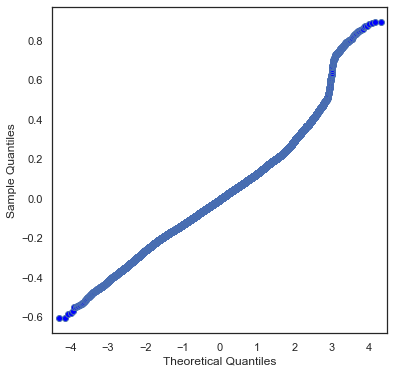

                            OLS Regression Results                            
Dep. Variable:                logZORI   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                 2.057e+04
Date:                Mon, 19 Jul 2021   Prob (F-statistic):               0.00
Time:                        04:06:04   Log-Likelihood:                 70079.
No. Observations:              124579   AIC:                        -1.401e+05
Df Residuals:                  124546   BIC:                        -1.398e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

In [45]:
# Ran this to get the p-values for variables
import statsmodels.api as sm 
model2X_add_const = sm.add_constant(model2X_train)
model2sm = sm.OLS(model2y_train, model2X_add_const)
fitted = model2sm.fit()
res = fitted.resid
fig = sm.qqplot(res)
plt.show()
print(fitted.summary())

#### Building Model 3

In [46]:
# Dropped the only feature with high p-value i.e. logmillion_dollar_housing_units
#Split into test and train sets using the indices from same split as before in model 2
model3X_train = model2X_train.drop('logmillion_dollar_housing_units', axis=1)
model3X_test = model2X_test.drop('logmillion_dollar_housing_units', axis =1)
model3y_train= model2y_train.copy()
model3y_test = model2y_test.copy()

In [47]:
# Model3 linear regression. No difference with/without normalization
model3_ols = LinearRegression()
model3_ols.fit(model3X_train, model3y_train)

LinearRegression()

In [48]:
#Scores for train and test sets
print("R^2 for train set: %f" %model3_ols.score(model3X_train, model3y_train))

print('-'*30)

print("R^2 for test  set: %f" %model3_ols.score(model3X_test, model3y_test))

R^2 for train set: 0.840892
------------------------------
R^2 for test  set: 0.842744


In [49]:
# RMSE for model3. nearly same as model 2; although we dropped the variable with high p-value, predictor variance is still getting explained with same scores
mean_squared_error(np.exp(model3y_test), np.exp(model3_ols.predict(model3X_test)), squared = False)

264.8035028245346

In [50]:
print(model2X_train.shape)
model3X_train.shape

(124579, 32)


(124579, 31)

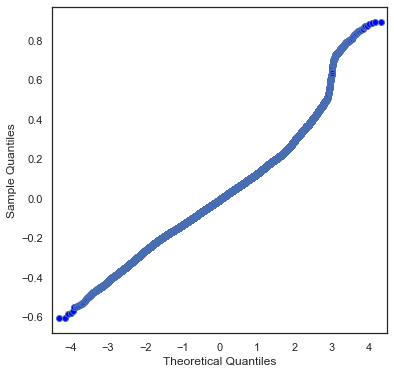

                            OLS Regression Results                            
Dep. Variable:                logZORI   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                 2.123e+04
Date:                Mon, 19 Jul 2021   Prob (F-statistic):               0.00
Time:                        04:06:04   Log-Likelihood:                 70079.
No. Observations:              124579   AIC:                        -1.401e+05
Df Residuals:                  124547   BIC:                        -1.398e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

In [51]:
# Ran this to get the p-values for variables of model 3
import statsmodels.api as sm 
model3X_add_const = sm.add_constant(model3X_train)
model3sm = sm.OLS(model3y_train, model3X_add_const)
fitted = model3sm.fit()
res = fitted.resid
fig = sm.qqplot(res)
plt.show()
print(fitted.summary())

In [52]:
testResults = model3X_test.copy()
testResults['Actual'] = np.exp(model3y_test)
predictions = model3_ols.predict(model3X_test)
testResults['Predicted'] =np.around(np.exp(predictions),0)

In [53]:
testResults

,RegionName,Year,dwellings_1_units_detached,logrenter_occupied_housing_units_paying_cash_median_gross_rent,logowner_occupied_housing_units_median_value,sqrtmarried_households,loghousing_units_renter_occupied,sqrtnonfamily_households,logvacant_housing_units_for_rent,logmedian_income,...,sqrtwhite_pop,loghispanic_pop,sqrttotal_pop,logblack_pop,logwalked_to_work,logcommuters_by_public_transportation,logcommute_10_14_mins,log_gini_index,Actual,Predicted
130260,48083,2014,6170,6.818924,12.01370,71.33723,8.141481,52.55473,4.867534,11.09052,...,128.09370,6.763885,153.85380,7.152269,4.875197,4.158883,7.408531,-0.810805,1315.999853,1086.0
30327,29414,2015,9699,6.990257,12.21652,84.66404,8.656607,81.90238,5.303305,11.11031,...,168.37460,7.269617,192.89890,8.739376,5.159055,4.644391,7.243513,-0.922309,1187.999406,1278.0
83390,95835,2017,10663,7.382746,12.76053,85.94184,8.552753,60.38212,4.624973,11.38275,...,116.11200,8.881420,196.48660,8.478452,4.997212,6.278521,7.410952,-0.969955,1816.000801,1782.0
111666,2119,2015,612,6.827629,12.67826,44.32832,9.040738,70.21396,6.224558,10.27108,...,50.63596,8.934192,162.04630,9.569692,7.014814,8.383890,6.706862,-0.639796,2196.000433,1501.0
153634,27377,2014,1902,6.835185,12.06681,42.05948,6.673298,28.49561,3.688879,10.94870,...,68.88396,5.826000,86.29600,7.702556,1.098612,0.000000,6.194405,-0.935219,1111.000234,1096.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36330,19464,2014,10017,6.745236,12.03528,92.61749,8.630165,78.91768,5.537334,10.93427,...,189.65490,7.812783,214.04440,8.650850,6.790097,5.583496,8.025189,-0.868215,990.000056,1075.0
91008,32211,2018,8362,6.749931,11.67929,68.46897,8.911395,72.09716,6.822197,10.58089,...,123.74970,8.421343,186.02960,9.460632,5.831882,6.867974,7.524021,-0.820981,1016.999597,992.0
65821,30152,2018,11342,7.108244,12.47113,95.83319,8.292799,59.60705,5.888878,11.40455,...,166.88620,8.217978,208.11050,8.986947,5.407172,5.493061,7.353722,-0.876349,1623.000702,1534.0
55513,60062,2018,10749,7.403061,13.12556,101.35090,7.939872,65.62012,4.828314,11.60834,...,178.81000,7.142827,201.14420,6.661855,4.779123,7.534228,7.605890,-0.702995,2181.000510,2150.0


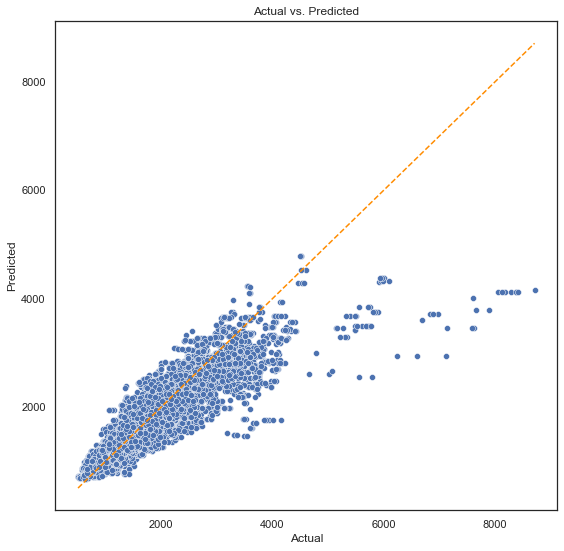

In [54]:
# Testing Linearity
sns.set(rc={'figure.figsize':(9,9)})
sns.set_style("white")
#predictions = model3_ols.predict(model3X_test)
# results = pd.DataFrame({"Actual": model3y_test, "Predicted": predictions})
# results['Residuals'] = abs(results['Actual']) - abs(results['Predicted'])
sns.scatterplot(x='Actual', y='Predicted', data=testResults)
line_coords = np.arange(testResults[['Actual', 'Predicted']].min().min(), testResults[['Actual', 'Predicted']].max().max()+1)
plt.plot(line_coords, line_coords, color='darkorange', linestyle='--')
plt.title('Actual vs. Predicted')
plt.show()

#### From Linearity plot of model 3, there appear to be many outliers. Tested the model again without outliers

In [55]:
indices = np.exp(zacs_features2['logZORI'])
indices = indices<4000

In [56]:
zacs_features3 = zacs_features2[indices]

In [57]:
print(zacs_features2.shape)
print(zacs_features3.shape)

(155724, 33)
(155033, 33)


#### Building Model 4

In [58]:
#Separating X and y variables for Model 4 which does not contain outliers of high rentals above $4000
model4X = zacs_features3.drop("logZORI", axis =1)
model4y = zacs_features3["logZORI"]

In [59]:
#Split into test and train sets for Model 4 which does not contain outliers
model4X_train, model4X_test, model4y_train, model4y_test = train_test_split(model4X, model4y, random_state=2, test_size=0.2)

In [60]:
# Model 4 linear regression
model4_ols = LinearRegression()
model4_ols.fit(model4X_train, model4y_train)

LinearRegression()

In [61]:
#Scores for train and test sets for Model 4
print("R^2 for train set: %f" %model4_ols.score(model4X_train, model4y_train))

print('-'*30)

print("R^2 for test  set: %f" %model4_ols.score(model4X_test, model4y_test))

R^2 for train set: 0.839407
------------------------------
R^2 for test  set: 0.839669


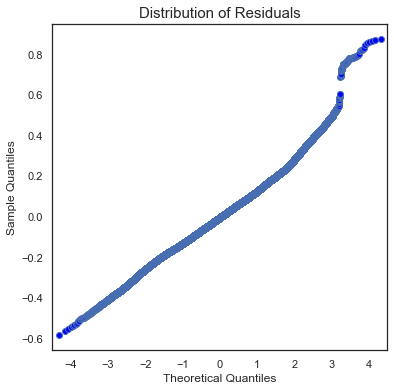

                            OLS Regression Results                            
Dep. Variable:                logZORI   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                 2.025e+04
Date:                Mon, 19 Jul 2021   Prob (F-statistic):               0.00
Time:                        05:18:29   Log-Likelihood:                 72587.
No. Observations:              124026   AIC:                        -1.451e+05
Df Residuals:                  123993   BIC:                        -1.448e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

In [91]:
# Ran this to get the p-values for variables of model 3
import statsmodels.api as sm 
model4X_add_const = sm.add_constant(model4X_train)
model4sm = sm.OLS(model4y_train, model4X_add_const)
fitted = model4sm.fit()
res = fitted.resid
fig = sm.qqplot(res)
plt.title('Distribution of Residuals', size =15)
plt.show()
print(fitted.summary())

In [62]:
# RMSE for model4; difference of only $30 compared to model 3
mean_squared_error(np.exp(model4y_test), np.exp(model4_ols.predict(model4X_test)), squared = False)

234.01726916044097

In [86]:
testResults4 = model4X_test.copy()
testResults4['Actual'] = np.exp(model4y_test)
predictions = model4_ols.predict(model4X_test)
testResults4['Predicted'] =np.around(np.exp(predictions),0)
testResults4['Residuals'] = abs(testResults4['Actual']) - abs(testResults4['Predicted'])

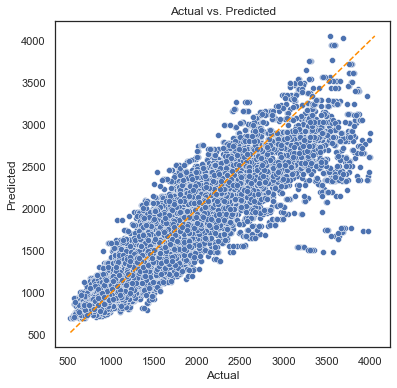

In [87]:
# Testing Linearity
sns.set(rc={'figure.figsize':(6,6)})
sns.set_style("white")
sns.scatterplot(x='Actual', y='Predicted', data=testResults4)
line_coords = np.arange(testResults4[['Actual', 'Predicted']].min().min(), testResults4[['Actual', 'Predicted']].max().max()+1)
plt.plot(line_coords, line_coords, color='darkorange', linestyle='--')
plt.title('Actual vs. Predicted')
plt.show()

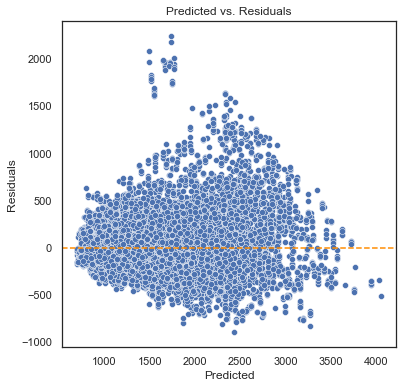

In [92]:
# Checking for constant variance for Model 4
sns.set(rc={'figure.figsize':(6,6)})
sns.set_style("white")
sns.scatterplot(x='Predicted', y ='Residuals', data = testResults4)
plt.axhline(y = 0, color='darkorange', linestyle='--')
plt.title('Predicted vs. Residuals')
plt.show()

In [96]:
# ACS, ZORI AND EDU data file that Ben had created
acszorigrad_baseline = pd.read_csv("acszorigrads_baseline.csv")

In [ ]:
acszorigrad_baseline.shape

In [97]:
acszorigrad_baseline.rename(columns = {'Zips': 'RegionName'}, inplace =True)

In [ ]:
acszorigrad_baseline.head()

In [98]:
# Created edu dataframe by just using the required columns from Ben's file 
edu = acszorigrad_baseline[["RegionID",'RegionName', 'Year','Month','FIPST', 'ALL_RATE']]

In [ ]:
edu.head()

In [ ]:
# Wrote it to csv
edu.to_csv("edu.csv")

In [94]:
#Zacs.csv was also created in 'R' by merging the ZORI and ACS datasets, some feature engineering and slecting certain features
zacs = pd.read_csv("zacs.csv")

In [ ]:
zacs.isnull().sum(axis=0)

In [ ]:
zacs.shape

In [ ]:
zacs_features2.shape

In [99]:
# Outer merged zacs with edu
zacs_edu = pd.merge(zacs, edu, how ='outer', on = ['RegionID','RegionName', 'Year', 'Month'])

In [ ]:
zacs_edu.shape

In [ ]:
edu.shape

In [ ]:
# see a lot of null values in the columns corrsponding to education
zacs_edu.isnull().sum()

In [ ]:
# Wrote the Csv file 
zacs_edu.to_csv("zacs_edu.csv")

<AxesSubplot:xlabel='ALL_RATE', ylabel='ZORI'>

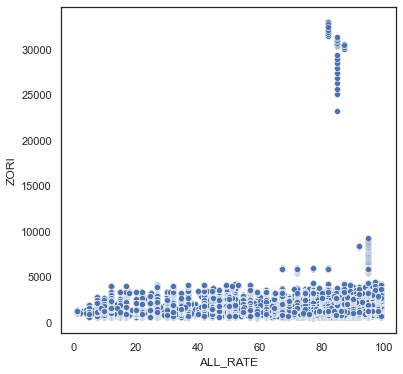

In [100]:
# Visualized the scatter between ZORI and ALL_STATE
sns.scatterplot(x="ALL_RATE", y="ZORI", data=zacs_edu)

<AxesSubplot:xlabel='FIPST', ylabel='ZORI'>

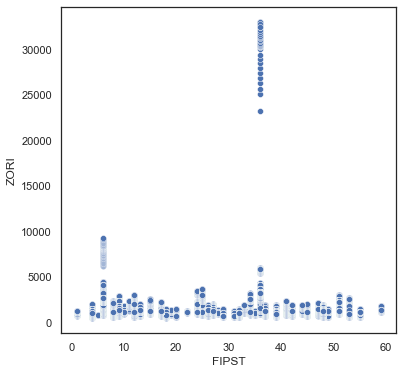

In [102]:
# Scatter between FIPST and ZORI
sns.scatterplot(x="FIPST", y="ZORI", data=zacs_edu)

In [103]:
# Read zacs_edu.csv in R and imputed values in 2018 in ALL_RATE column using median values from previous years of a certain region.
# Created zacs_edu1.csv in R
zacs_edu1 = pd.read_csv("zacs_edu1.csv", index_col =0)

In [ ]:
zacs_edu1.head()

In [ ]:
zacs_edu1.shape

In [ ]:
zacs_edu1.isnull().sum()

#### MLR on features from ZORI, ACS and EDU  datasets

In [104]:
#Separating X and y variables
model_eduX= zacs_edu1.drop(["ZORI"], axis =1)
model_eduy = zacs_edu1["ZORI"]

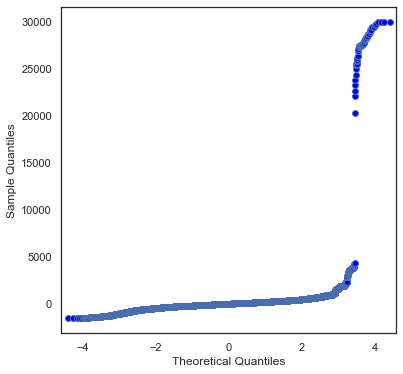

                            OLS Regression Results                            
Dep. Variable:                   ZORI   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     6234.
Date:                Mon, 19 Jul 2021   Prob (F-statistic):               0.00
Time:                        05:26:22   Log-Likelihood:            -1.3995e+06
No. Observations:              182226   AIC:                         2.799e+06
Df Residuals:                  182190   BIC:                         2.799e+06
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

In [105]:
import statsmodels.api as sm 
model_eduX_add_const = sm.add_constant(model_eduX)
model_edu_sm = sm.OLS(model_eduy, model_eduX_add_const)
fitted = model_edu_sm.fit()
res = fitted.resid
fig = sm.qqplot(res)
plt.show()
print(fitted.summary())

In [106]:
#Separating X and y variables for Model 6 which contains "edu" columns
model6X = zacs_edu1.drop(["ZORI"], axis =1)
model6y = zacs_edu1["ZORI"]

In [107]:
#Split into test and train sets for Model 6
model6X_train, model6X_test, model6y_train, model6y_test = train_test_split(model6X, model6y, random_state=2, test_size=0.2)

In [108]:
# Model 6 linear regression
model6_ols = LinearRegression(normalize =True)
model6_ols.fit(model6X, model6y)

LinearRegression(normalize=True)

In [109]:
#Scores for train and test sets for Model 6
print("R^2 for train set: %f" %model6_ols.score(model6X_train, model6y_train))

print('-'*30)

print("R^2 for test  set: %f" %model6_ols.score(model6X_test, model6y_test))

R^2 for train set: 0.529061
------------------------------
R^2 for test  set: 0.620503


In [110]:
# RMSE for model6; addition of the graduation rate column really messed R2 and RMSE
from sklearn.metrics import mean_squared_error
mean_squared_error(model6y_test, model6_ols.predict(model6X_test), squared = False)

445.95928465700587

In [111]:
# Removing the high-priced observations and testing one more time
indices = zacs_edu1['ZORI'] <4000
zacs_edu11 = zacs_edu1[indices]

In [ ]:
zacs_edu11.shape

In [112]:
#Separating X and y variables for Model 7 which contains "edu" columns
model7X = zacs_edu11.drop(["ZORI"], axis =1)
model7y = zacs_edu11["ZORI"]

In [113]:
#Split into test and train sets for Model 7
model7X_train, model7X_test, model7y_train, model7y_test = train_test_split(model7X, model7y, random_state=2, test_size=0.2)

In [114]:
# Model 7 linear regression
model7_ols = LinearRegression(normalize =True)
model7_ols.fit(model7X_train, model7y_train)

LinearRegression(normalize=True)

In [115]:
#Scores for Model 7
print("R^2 for train set: %f" %model7_ols.score(model7X_train, model7y_train))

print('-'*30)

print("R^2 for test  set: %f" %model7_ols.score(model7X_test, model7y_test))

R^2 for train set: 0.854330
------------------------------
R^2 for test  set: 0.856207


In [116]:
#RMSE for model7. Much better RMSE now with removal of high-priced rentals
from sklearn.metrics import mean_squared_error
mean_squared_error(model7y_test, model7_ols.predict(model7X_test), squared = False)

215.76038404854276

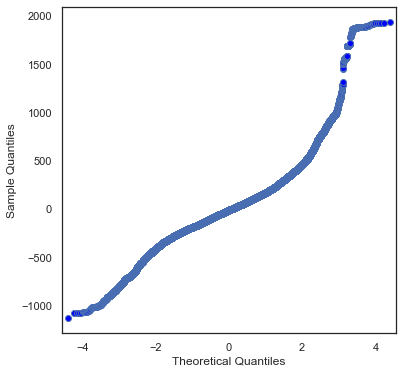

                            OLS Regression Results                            
Dep. Variable:                   ZORI   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                 3.053e+04
Date:                Mon, 19 Jul 2021   Prob (F-statistic):               0.00
Time:                        05:27:10   Log-Likelihood:            -1.2348e+06
No. Observations:              181674   AIC:                         2.470e+06
Df Residuals:                  181638   BIC:                         2.470e+06
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

In [117]:
# Statsmodel for Model 7
import statsmodels.api as sm 
model7X_add_const = sm.add_constant(model7X)
model7_sm = sm.OLS(model7y, model7X_add_const)
fitted = model7_sm.fit()
res = fitted.resid
fig = sm.qqplot(res)
plt.show()
print(fitted.summary())

In [119]:
#Run LassoCV to determine optimal lambda/alpha
from sklearn.linear_model import LassoCV
model72lasso = LassoCV() 

model72lasso.set_params(cv = 5, random_state = 2, alphas = np.linspace(0.00001,0.0002,100), normalize=True, n_jobs =-1)
model72lasso.fit(model7X_train, model7y_train)

LassoCV(alphas=array([1.00000000e-05, 1.19191919e-05, 1.38383838e-05, 1.57575758e-05,
       1.76767677e-05, 1.95959596e-05, 2.15151515e-05, 2.34343434e-05,
       2.53535354e-05, 2.72727273e-05, 2.91919192e-05, 3.11111111e-05,
       3.30303030e-05, 3.49494949e-05, 3.68686869e-05, 3.87878788e-05,
       4.07070707e-05, 4.26262626e-05, 4.45454545e-05, 4.64646465e-05,
       4.83838384e-05, 5.03030303e-0...
       1.55858586e-04, 1.57777778e-04, 1.59696970e-04, 1.61616162e-04,
       1.63535354e-04, 1.65454545e-04, 1.67373737e-04, 1.69292929e-04,
       1.71212121e-04, 1.73131313e-04, 1.75050505e-04, 1.76969697e-04,
       1.78888889e-04, 1.80808081e-04, 1.82727273e-04, 1.84646465e-04,
       1.86565657e-04, 1.88484848e-04, 1.90404040e-04, 1.92323232e-04,
       1.94242424e-04, 1.96161616e-04, 1.98080808e-04, 2.00000000e-04]),
        cv=5, n_jobs=-1, normalize=True, random_state=2)

In [120]:
print("Optimal alpha:\t", model72lasso.alpha_)
print("Coefficients:\t", model72lasso.coef_)
print("Intecept:\t", model72lasso.intercept_)

Optimal alpha:	 1e-05
Coefficients:	 [-3.17962081e-04 -1.90536022e-04  1.89584162e+01  5.60627859e+00
  5.87400387e-01  1.14972971e-03 -1.98214139e-02 -2.45013314e-02
 -2.92192453e-02 -7.40225557e-02  4.67184181e-02  3.25351872e-02
 -4.36083604e-04  5.63639879e-02  1.83969235e-03  5.66929929e-02
  1.20722379e-02 -4.97087258e-03 -1.29916758e-02 -1.03837358e-02
 -5.05668145e-02  7.98843515e-03  5.78401863e-02  2.53512375e-02
  5.50467458e-02  7.18509094e+00 -4.88663126e-04 -4.74857703e-03
 -6.11895547e-04 -1.77507653e-03  6.20679094e-02  6.27355927e-03
  1.58579005e-02  8.97503974e+02  2.14079897e-01]
Intecept:	 -38386.94450611117


In [121]:
# R^2 for LassoCV
print(model72lasso.score(model7X_train, model7y_train))
print('-'*50)
print("R^2 for test  set: %f" %model72lasso.score(model7X_test, model7y_test))

0.8543300997812662
--------------------------------------------------
R^2 for test  set: 0.856209


In [123]:
# Coefficients corresponding to optimal alpha
import dataframe_image as dfi
lasso_optimalCoefs = pd.DataFrame({"Attributes": model7X_train.columns, "Coefficients": model72lasso.coef_})
lasso_optimalCoefs.to_csv("lasso_optimalCoefs.csv")
#dfi.export(lasso_optimalCoefs, 'lasso_optimalCoefs.png')

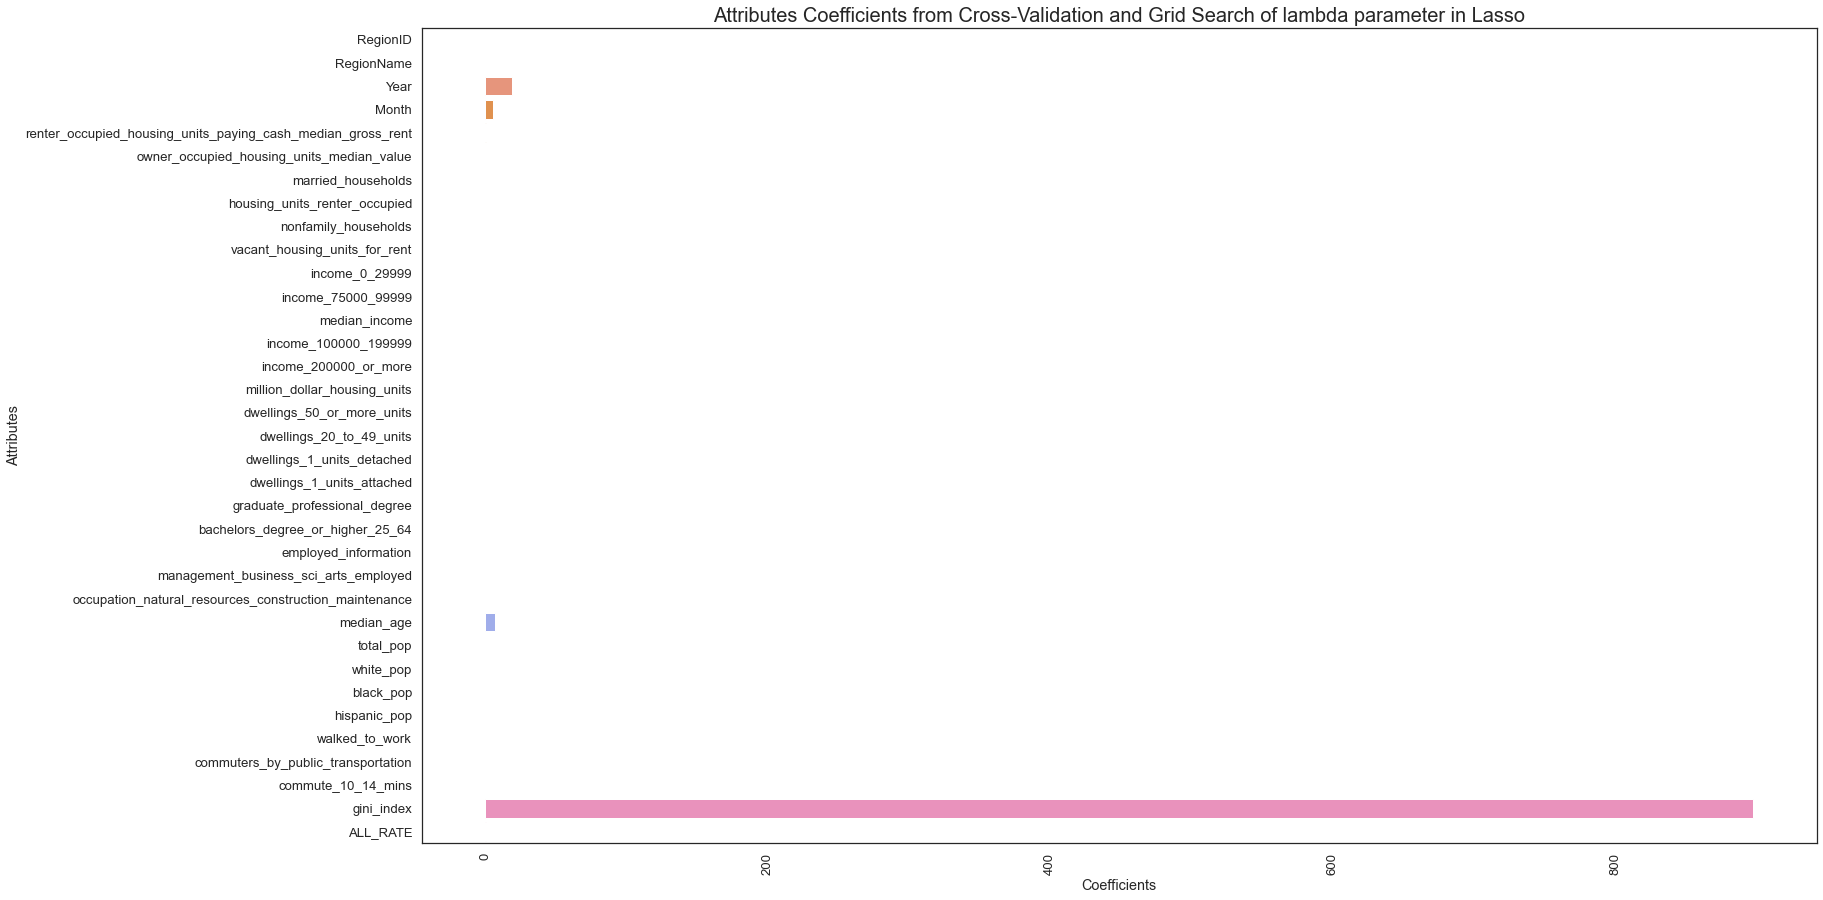

In [124]:
sns.set(rc={'figure.figsize':(25,15)}, font_scale =1.2)
sns.set_style("white")
sns.barplot(y='Attributes', x='Coefficients', data=lasso_optimalCoefs)
plt.title('Attributes Coefficients from Cross-Validation and Grid Search of lambda parameter in Lasso', size =20)
plt.xticks(rotation = 90)

plt.show()